In [3]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersImage

# Construct Data
Generate N datasets with noise and N with noise and circle

In [5]:
N = 200
N_per_class = int(N / 2)
N_in_class = 400

def noise(N, scale):
    return scale * np.random.random((N, 2))

def circle(N, scale, offset):
    return offset + scale * datasets.make_circles(n_samples=N, factor=0.4, noise=0.05)[0]

# for loop creates N noise pics each with with N_in_class=2N pts
just_noise = [noise(N_in_class, 150) for _ in range(N_per_class)]

#for loop creates N "noise with circle" pics. each with N pts on circle, N pts noise
half = int(N_in_class / 2)
with_circle = [np.concatenate((circle(half, 50, 70), noise(half, 150)))
               for _ in range(N_per_class)]

#creates the data set with N/2 pics of noise and N/2 pics of noise w/circle
datas = []
datas.extend(just_noise)
datas.extend(with_circle)

# Define labels that trains ML either just noise=0 or w/circle=1
labels = np.zeros(N)
labels[N_per_class:] = 1

In [6]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Let's visualize the data

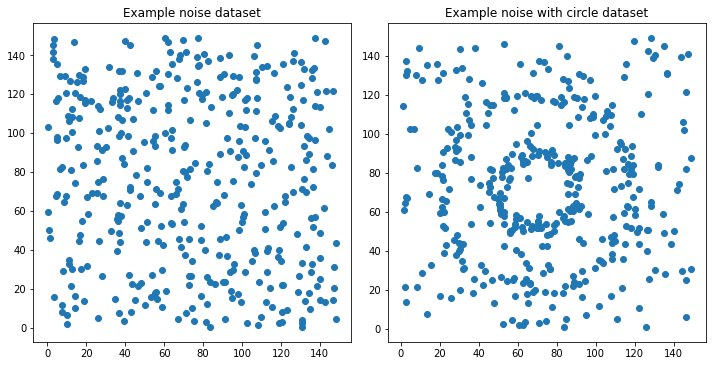

In [7]:
# Visualize the data
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10,5)

xs, ys = just_noise[0][:,0], just_noise[0][:,1]
axs[0].scatter(xs, ys)
axs[0].set_title("Example noise dataset")
axs[0].set_aspect('equal', 'box')

xs_, ys_ = with_circle[0][:,0], with_circle[0][:,1]
axs[1].scatter(xs_, ys_)
axs[1].set_title("Example noise with circle dataset")
axs[1].set_aspect('equal', 'box')

fig.tight_layout()

# Compute homology of each dataset
Generate Persistence diagram of for each of the N pics made above. diagrams_h1 pics out $H_1$

In [11]:
rips = Rips(maxdim=1, coeff=2)
diagrams = [rips.fit_transform(data) for data in datas]
#In rips.fit_transform: adding [1] picks out only H1 information
diagrams_h1 = [rips.fit_transform(data)[1] for data in datas]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


diagrams is an array of N PD's (which are 2N pts each)

# PD of Homology
rips.plot 

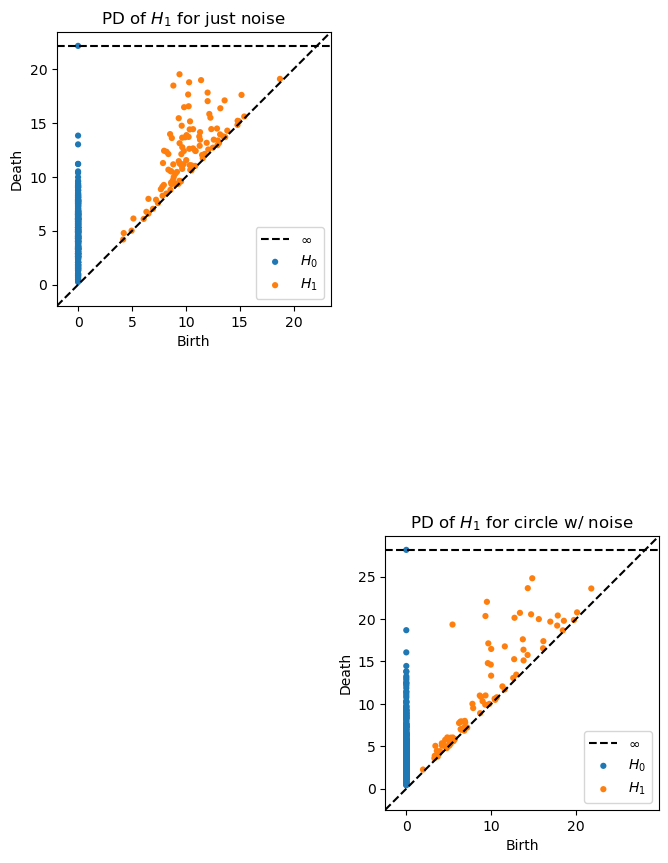

In [69]:
plt.figure(figsize=(12,12))
#231 means 2 rows, 3 cols (so 2*3=6 spots). place pic in spot 1
plt.subplot(231)

#rips.plot sees diagrams as array of N pics 
#Plot first PD
rips.plot(diagrams[0], show=False)
plt.title("PD of all H for just noise")

#plot Nth PD. place in spot 5
plt.subplot(235)
rips.plot(diagrams[-1], show=False)
plt.title("PD of all H for circle w/ noise")

plt.show()

# Persistence Diagrams of just $H_1$
Let's plot the PD of $H_1$ for both using diagrams_h1 which was the [1] of the array diagrams

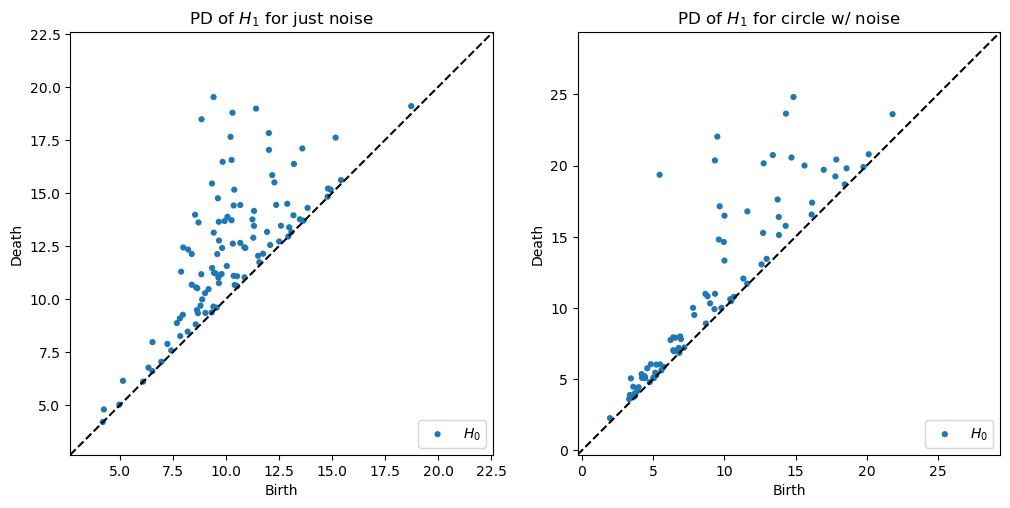

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(121)

#plot first
rips.plot(diagrams_h1[0], show=False)
plt.title("PD of $H_1$ for just noise")

#plot last
plt.subplot(122)
rips.plot(diagrams_h1[-1], show=False)
plt.title("PD of $H_1$ for circle w/ noise")

plt.show()

# Compute persistence images
Convert each persistence diagram into a persistence image. That is, rotate -45 degrees, gaussian blur at each pt.


In [121]:
# sets up 20 by 20 pixel images where gaussian spread is 1
pim = PersImage(pixels=[20,20], spread=1)

#Transform H1 diagrams
imgs = pim.transform(diagrams_h1)

PersImage(pixels=[20, 20], spread=1, specs=None, kernel_type="gaussian", weighting_type="linear")


In [93]:
type(pim),type(imgs),type(imgs[1][1][1])

(persim.images.PersImage, list, numpy.float64)

In [101]:
np.shape(imgs)

(200, 20, 20)

### Flatten each image into a vector format for ML

In [122]:
imgs_array = np.array([img.flatten() for img in imgs])

In [100]:
np.shape(imgs_array)

(200, 400)

In [109]:
type(imgs_array)

numpy.ndarray

### Plot a few PI's

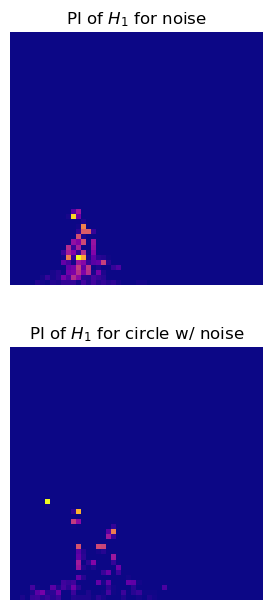

In [115]:
plt.figure(figsize=(15,7.5))

for i in range(1):
    #subplot position 2 rows, 4cols at place i+1
    ax = plt.subplot(240+i+1)
    pim.show(imgs[i], ax)
    plt.title("PI of $H_1$ for noise")

for i in range(1):
    #place 5 is start of 2nd row
    ax = plt.subplot(240+i+5)
    #note negative sign to start from end of imgs background
    pim.show(imgs[-(i+1)], ax)
    plt.title("PI of $H_1$ for circle w/ noise")

# Classify the datasets from the persistence images

In [123]:
X_train, X_test, y_train, y_test = train_test_split(imgs_array, labels, test_size=0.40, random_state=42)

In [124]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [126]:
lr.score(X_test,y_test)

1.0

# Inverse analysis on LASSO
Visualizing the regression coefficients as a persistence image shows us which features of the images are most important for classification.

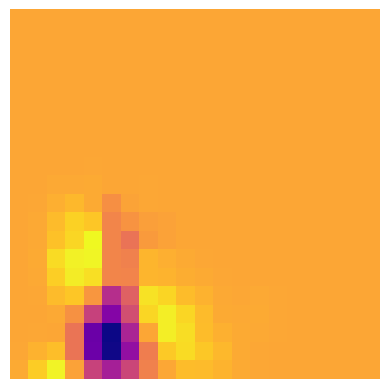

In [127]:
inverse_image = np.copy(lr.coef_).reshape((20,20))
pim.show(inverse_image)